In [66]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [67]:
df = pd.read_csv("C:\\Users\\dell\\Desktop\\datasets\\titanic.csv")

In [68]:
df.head()

,Survived,Pclass,Name,Sex,Age,Siblings/Spouses Aboard,Parents/Children Aboard,Fare
0,0,3,Mr. Owen Harris Braund,male,22.0,1,0,7.2500
1,1,1,Mrs. John Bradley (Florence Briggs Thayer) Cum...,female,38.0,1,0,71.2833
2,1,3,Miss. Laina Heikkinen,female,26.0,0,0,7.9250
3,1,1,Mrs. Jacques Heath (Lily May Peel) Futrelle,female,35.0,1,0,53.1000
4,0,3,Mr. William Henry Allen,male,35.0,0,0,8.0500


In [69]:
df.shape

(887, 8)

In [70]:
# In this output column is survived column
# 0 means person died
# 1 means person survived
# Its classification task because we have to assign either 1 or 0

# We can drop the name column as it will not help in prediction

In [71]:
df.isnull().sum()

Survived                   0
Pclass                     0
Name                       0
Sex                        0
Age                        0
Siblings/Spouses Aboard    0
Parents/Children Aboard    0
Fare                       0
dtype: int64

In [72]:
df.drop("Name", axis = 1, inplace = True)

In [73]:
df

,Survived,Pclass,Sex,Age,Siblings/Spouses Aboard,Parents/Children Aboard,Fare
0,0,3,male,22.0,1,0,7.2500
1,1,1,female,38.0,1,0,71.2833
2,1,3,female,26.0,0,0,7.9250
3,1,1,female,35.0,1,0,53.1000
4,0,3,male,35.0,0,0,8.0500
...,...,...,...,...,...,...,...
882,0,2,male,27.0,0,0,13.0000
883,1,1,female,19.0,0,0,30.0000
884,0,3,female,7.0,1,2,23.4500
885,1,1,male,26.0,0,0,30.0000


In [74]:
df.Survived.value_counts()

0    545
1    342
Name: Survived, dtype: int64

In [75]:
df.Pclass.value_counts()

3    487
1    216
2    184
Name: Pclass, dtype: int64

In [76]:
pd.crosstab(df.Pclass,df.Survived)

Survived,0,1
Pclass,,
1,80,136
2,97,87
3,368,119


In [77]:
pd.crosstab(df.Sex,df.Survived)

Survived,0,1
Sex,,
female,81,233
male,464,109


<AxesSubplot:xlabel='Survived', ylabel='Age'>

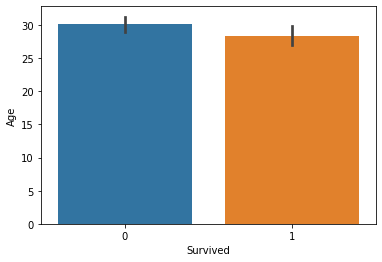

In [78]:
sns.barplot(x = "Survived", y = "Age", data = df)

In [79]:
df.groupby("Survived").mean()["Age"]

Survived
0    30.138532
1    28.408392
Name: Age, dtype: float64

In [80]:
df.corr()

,Survived,Pclass,Age,Siblings/Spouses Aboard,Parents/Children Aboard,Fare
Survived,1.000000,-0.336528,-0.059665,-0.037082,0.080097,0.256179
Pclass,-0.336528,1.000000,-0.391492,0.085026,0.020252,-0.548919
Age,-0.059665,-0.391492,1.000000,-0.297669,-0.193741,0.112329
Siblings/Spouses Aboard,-0.037082,0.085026,-0.297669,1.000000,0.414244,0.158839
Parents/Children Aboard,0.080097,0.020252,-0.193741,0.414244,1.000000,0.215470
Fare,0.256179,-0.548919,0.112329,0.158839,0.215470,1.000000


In [81]:
df = pd.get_dummies(df, drop_first=True)

In [82]:
df.head()

,Survived,Pclass,Age,Siblings/Spouses Aboard,Parents/Children Aboard,Fare,Sex_male
0,0,3,22.0,1,0,7.2500,1
1,1,1,38.0,1,0,71.2833,0
2,1,3,26.0,0,0,7.9250,0
3,1,1,35.0,1,0,53.1000,0
4,0,3,35.0,0,0,8.0500,1


In [83]:
x = df.drop("Survived", axis = 1)
y = df[["Survived"]]

In [84]:
# Split the data into testing and training data
from sklearn.model_selection import train_test_split

In [86]:
X_train, X_test, y_train, y_test=train_test_split(x,y,test_size=0.2,random_state=42,stratify=y)

In [88]:
X_train.head()

,Pclass,Age,Siblings/Spouses Aboard,Parents/Children Aboard,Fare,Sex_male
851,3,18.0,0,1,9.3500,0
650,3,16.0,0,0,7.8292,0
103,3,37.0,2,0,7.9250,1
101,1,21.0,0,1,77.2875,1
292,3,24.0,0,0,7.8958,1


In [ ]:
# NaiveBayes algorithm

In [89]:
from sklearn.naive_bayes import GaussianNB

In [90]:
model = GaussianNB()

In [91]:
model.fit(X_train,y_train)

C:\Users\dell\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


GaussianNB()

In [92]:
ypred = model.predict(X_test)

In [94]:
from sklearn.metrics import accuracy_score, plot_confusion_matrix, classification_report

In [96]:
accuracy_score(y_test, ypred)

0.7584269662921348

In [97]:
# KNN algorithm

In [98]:
from sklearn.neighbors import KNeighborsClassifier

In [99]:
KNN = KNeighborsClassifier(n_neighbors = 5)

In [101]:
KNN.fit(X_train, y_train)

C:\Users\dell\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


KNeighborsClassifier()

In [102]:
ypred1 = KNN.predict(X_test)

In [104]:
accuracy_score(y_test,ypred1)

0.6685393258426966

In [105]:
# scaling data first

In [106]:
from sklearn.preprocessing import StandardScaler

In [108]:
scalar = StandardScaler()

In [110]:
X_train_s = scalar.fit_transform(X_train)
X_test_s = scalar.transform(X_test)

In [118]:
KNN2 = KNeighborsClassifier(n_neighbors = 5)

In [120]:
KNN2.fit(X_train_s,y_train)

C:\Users\dell\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


KNeighborsClassifier()

In [121]:
ypred2 = KNN2.predict(X_test_s)

In [122]:
accuracy_score(y_test,ypred2)

0.7921348314606742

C:\Users\dell\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


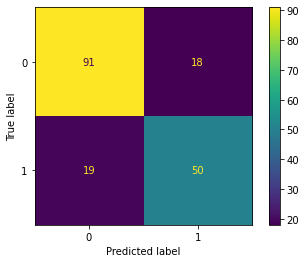

In [123]:
# for tuning the model
plot_confusion_matrix(KNN2,X_test_s,y_test)